In [1]:
! pip install minisom

  Using cached MiniSom-2.3.0-py3-none-any.whl


In [17]:
import minisom
from minisom import MiniSom
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Homework4 Self-organizing map(SOM)

In this notebook we will use the data of 2500 molecules we already obtained by the end of the Mordred part of Week9 hands-on session. You can download the dataset `mordred_df.csv` from Canvas.

In [3]:
data = pd.read_csv("./mordred_df.csv")

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (158,167,176,185,194,203,212,221,230,239,248,365,374,383,392,401,410,419,428,437,446,455,464,472,480,488,496,504,512,520,528,536,544,552,560,568,576,584,592,600,608,616,624,632,640,648,656,890,891,906,907,1592) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,HOMO,LUMO,GAP,R2,ZPVE,U0,U,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,10000,10000,-0.2818,0.0280,0.3097,1109.2219,0.163679,-365.089448,-365.079822,...,8.124151,34.544698,113.084064,5.951793,67,8,30.0,31.0,4.722222,2.111111
1,1,10001,10001,-0.2338,0.0329,0.2667,1089.3310,0.175667,-345.190043,-345.180226,...,8.124151,34.544698,112.100048,5.605002,67,8,30.0,31.0,4.722222,2.111111
2,2,10002,10002,-0.2355,0.0301,0.2656,1055.7727,0.165093,-361.232458,-361.222832,...,8.124151,34.544698,113.095297,5.952384,67,8,30.0,31.0,4.722222,2.111111
3,3,10003,10003,-0.2497,0.0220,0.2716,1013.7067,0.152666,-381.108212,-381.099011,...,8.124151,34.544698,114.079313,6.337740,67,8,30.0,31.0,4.722222,2.111111
4,4,10004,10004,-0.2468,0.0315,0.2783,1158.4078,0.175927,-345.197890,-345.188039,...,8.124151,34.544698,112.100048,5.605002,67,8,30.0,31.0,4.722222,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,12495,12495,-0.2358,0.0769,0.3128,853.7899,0.154789,-384.924399,-384.917197,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667
2496,2496,12496,12496,-0.2351,0.0884,0.3235,909.1024,0.178523,-349.001974,-348.994464,...,9.450066,58.686602,112.088815,5.604441,56,7,46.0,56.0,2.423611,1.666667
2497,2497,12497,12497,-0.2260,0.0838,0.3098,850.3884,0.154001,-384.917317,-384.909969,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667
2498,2498,12498,12498,-0.2464,0.0896,0.3360,852.9093,0.154925,-384.926418,-384.919218,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667


We picked 5 features from the dataset as the training data for SOM.

The meaning of these descriptors can be found here: http://mordred-descriptor.github.io/documentation/master/descriptors.html

In [5]:
subset = data[['nAtom', 'nBonds','bpol','apol','TopoPSA']]
traindata = subset.values

#normalize training data
traindata = (traindata - np.mean(traindata, axis=0)) / np.std(traindata, axis=0)

### To-do 1: Plot the feature correlation diagram for the dataframe `subset`. 
* Please refer to the feature correlation diagram in week5 hands-on jupyternotebook.

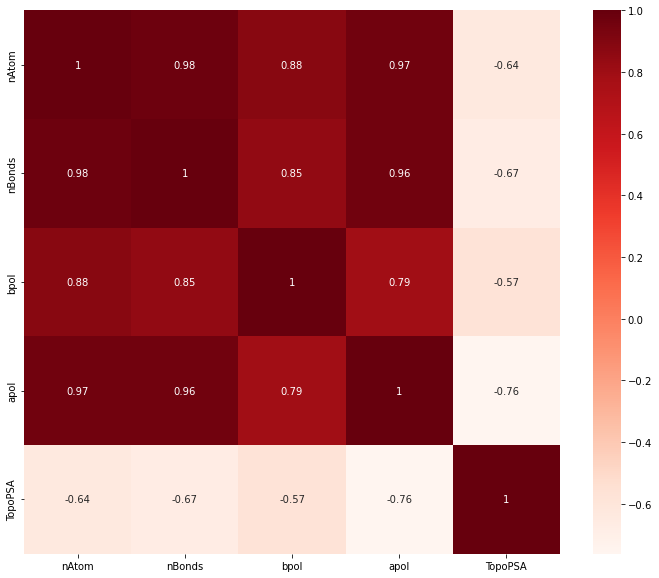

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sub = subset.corr()
sns.heatmap(sub, annot=True, cmap=plt.cm.Reds)
plt.show()

Train SOM with the traindata:

In [7]:
# Define a MiniSom object
size = 50
som = MiniSom(size, size, traindata.shape[1], sigma=1.0, learning_rate=1.0,neighborhood_function='gaussian', random_seed=0)

# Initialize the weights by PCA
som.pca_weights_init(traindata)

# trains the SOM with specified iterations
som.train(traindata, 5000)

Get the errors:

In [8]:
print('Topographic error: ', som.topographic_error(traindata))
print('Quantization error: ', som.quantization_error(traindata))

/opt/conda/lib/python3.9/site-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


Topographic error:  0.1132
Quantization error:  0.07760497732940605


### To-do 2: Visualize the SOM grid, show all the best matching units on it in red dots.

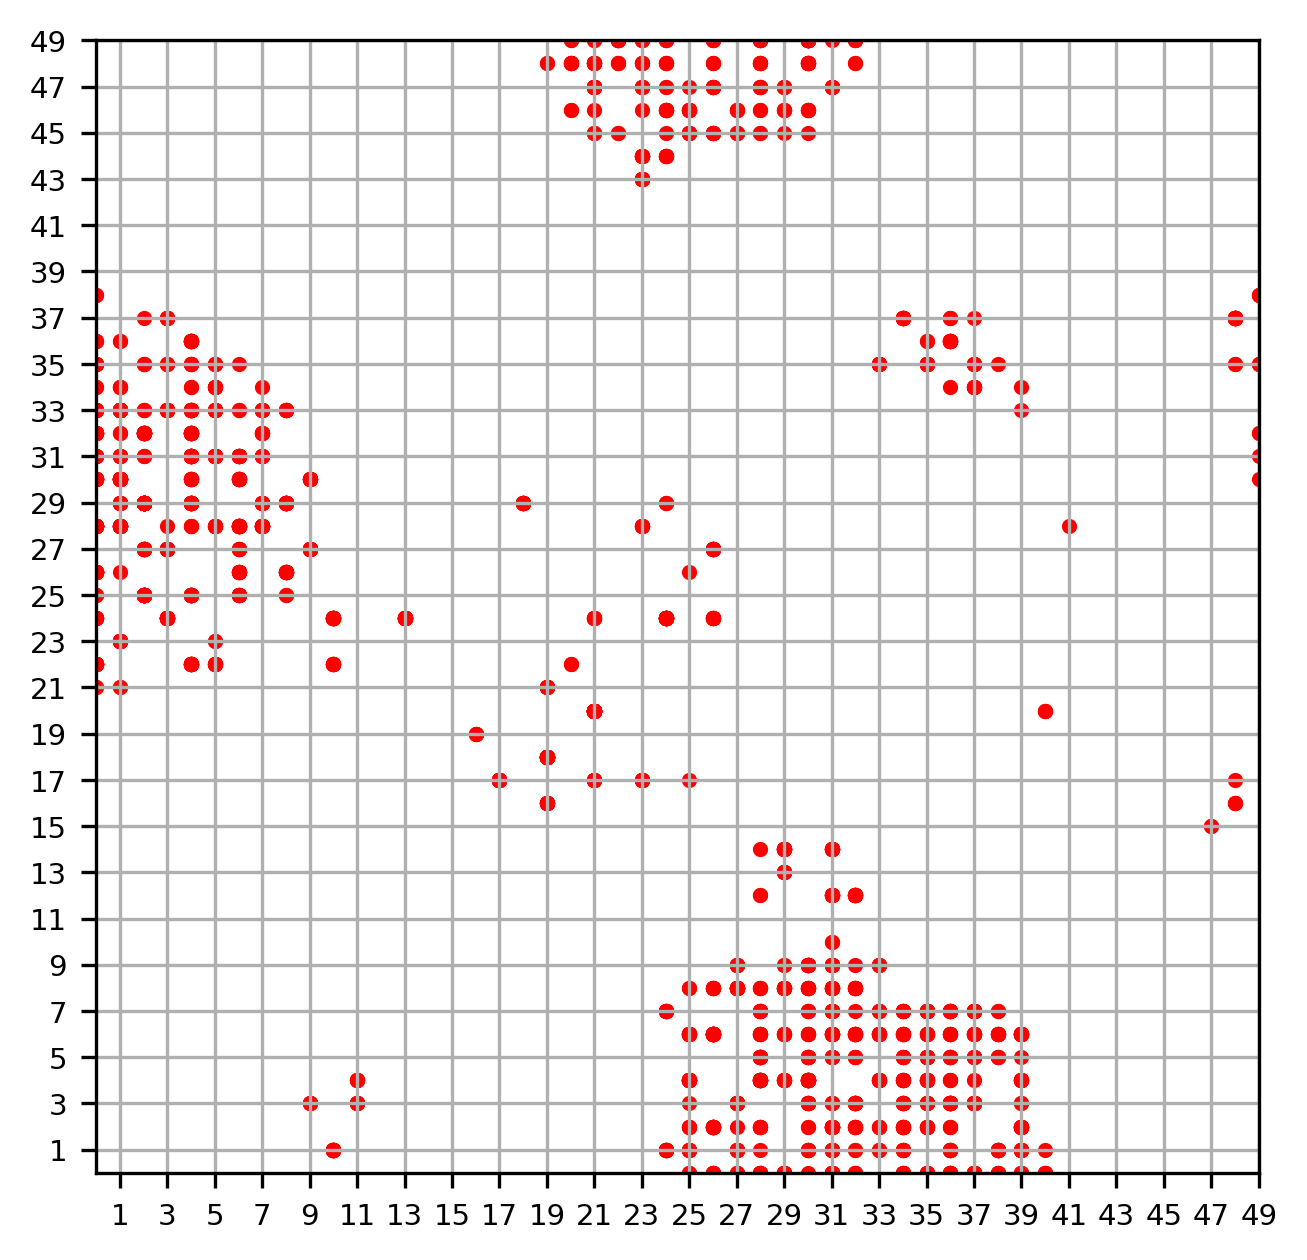

In [9]:
fig = plt.figure(figsize=(5, 5),dpi=300)
ax = fig.add_subplot(111)
for index, datapoint in enumerate(traindata):
    # find the best matching unit of the datapoint
    w = som.winner(datapoint)
    x_coord = w[0]
    y_coord = w[1]
    
    #plot the best matching unit
    plt.scatter(x_coord, y_coord, s=7, c='red')

#visualize the grid    
plt.ylim(0,size-1)
plt.xlim(0,size-1)
ax.set_xticks(np.linspace(1, 49, 25))
ax.tick_params(axis='both', which='major', labelsize=7)
ax.set_yticks(np.linspace(1, 49, 25))
plt.grid()

In [10]:
# get the weights of each node
W = som.get_weights()

Using the `get_weights` method of the som object, we can get the `weight` of each node in the SOM. (please refer to Prof.Luna Huang's lecture or the week9 hands-on notebook for the definition of `weight`, `node`)

What `get_weights` returns is an array with size of (`length`,`width`,`N`), `length` and `width` are the length and width of the size of the grid, `N` is the number of features in the training dataset. You can think of this arrays as N matrices with shape of (`length`,`width`), each such matrix is corresponding to the distribution of one features.

Then we can plot a heatmap for each of the features. In each heatmap we can show the distribution of the weight corresponding that feature.
For example in the below, the heatmap of `Number of Atoms` is given. The red region in this map indicates that the nodes in this region are corresponding to molecules with larger number of atoms, and blue region corresponds to molecules with smaller number of atoms. 

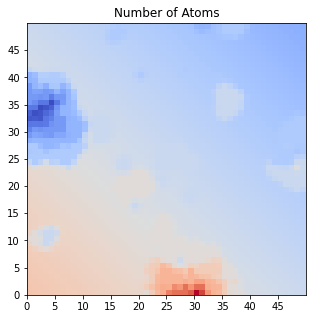

In [11]:
plt.figure(figsize=(5, 5))
plt.title('Number of Atoms')
plt.pcolor(W[:,:,0], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

### To-do 3: Plot the heatmaps for the rest 4 features.

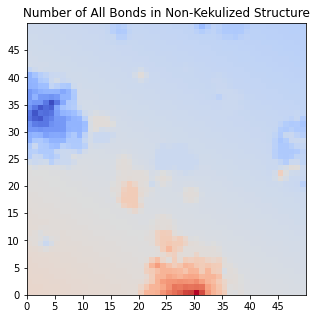

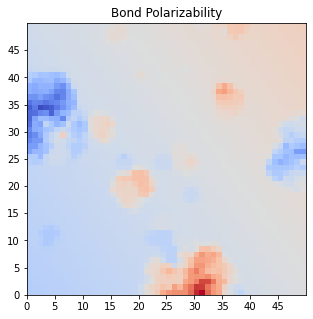

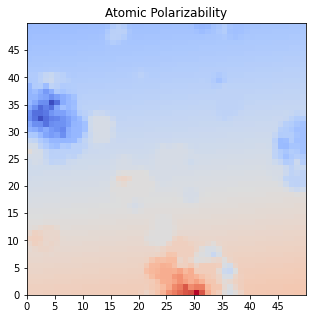

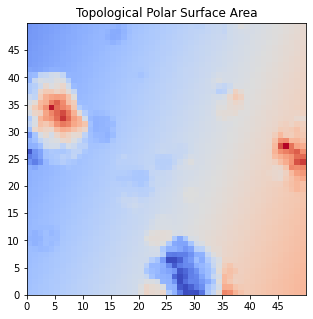

In [12]:
plt.figure(figsize=(5, 5))
plt.title('Number of All Bonds in Non-Kekulized Structure')
plt.pcolor(W[:,:,1], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

plt.figure(figsize=(5, 5))
plt.title('Bond Polarizability')
plt.pcolor(W[:,:,2], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

plt.figure(figsize=(5, 5))
plt.title('Atomic Polarizability')
plt.pcolor(W[:,:,3], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

plt.figure(figsize=(5, 5))
plt.title('Topological Polar Surface Area')
plt.pcolor(W[:,:,4], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

### To-do 4: 
Question: What you can observe from these heatmaps? Comparing with the feature correlation diagram you obtained in To-do 1, does it support what you observed from the heatmaps?

By observing these five heatmaps, we can tell that the feature, Topological Polar Surface Area, has low correlation with the other four features. On the other hand, Number of Atoms, Number of All Bonds in Non-Kekulized Structure, Bond Polarizability, and Atomic Polarizability have high correlation between each other. These heatmaps result are compatible with the feature correlation diagram in To-do 1.

## K-means clustering

You may observe some patterns from the heatmaps. For example, some regions seems to have relatively low values for all the features(shown in blue in all the heatmaps), some regions have high values for certain features while one feature value is low, etc.

Let's try performing K-means clustering on the SOM and see if the clustering result will refect the patterns we observed from heatmaps. It's essentially using the weights of all the nodes as the training data for KMeans. 

(If you have difficulty understanding this part, please refer to 'Using SOM in conjunction with other methods' part in the lecture slides)

In [13]:
# X is the training data of the KMeans. each row is the weight of one node.
X = W.reshape(2500,5)

In [14]:
# Fit Kmeans model with 4 clusters
kmeans = KMeans(n_clusters=4,random_state=55).fit(X)

### To-do 5: get the cluster index of each node. (Cluster index are numbers such as 0,1,2,or 3 indicating which cluster each sample belongs to)

* You can refer to: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
ClusterIndex = kmeans.fit_predict(X).reshape(-1, 1)
print(ClusterIndex)

NameError: name 'kmeans' is not defined

### We can then visualize the SOM grid along with the clustering result:

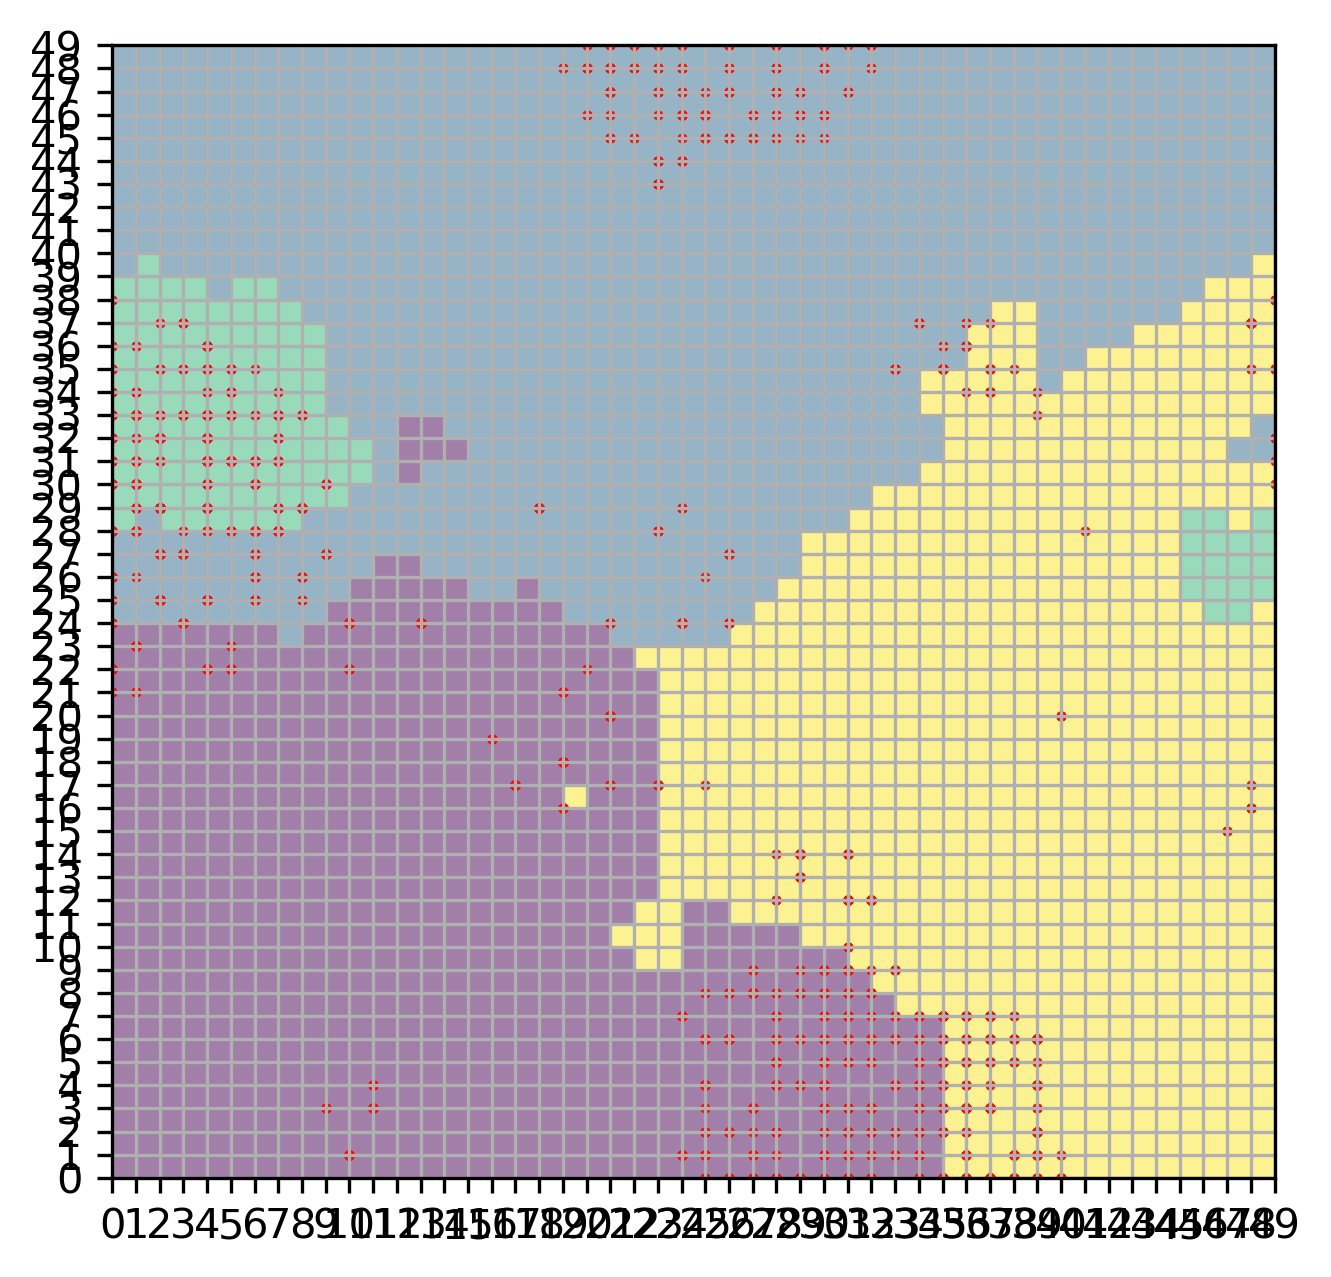

In [12]:
fig = plt.figure(figsize=(5, 5),dpi=300)
ax = fig.add_subplot(111)

plt.pcolor(kmeans.labels_.reshape(50,50),alpha=0.5)

for index, datapoint in enumerate(traindata):
    # find the best matching unit of the datapoint
    w = som.winner(datapoint)
    x_coord = w[0]
    y_coord = w[1]
    
    #plot the best matching unit
    plt.scatter(x_coord,y_coord,c='red',s=2)
    
#visualize the grid    
plt.ylim(0,size-1)
plt.xlim(0,size-1)
ax.set_xticks(range(size))
ax.set_yticks(range(size))
plt.grid()

### To-do 6: Find the optimal number of clusters using the silhouette method (Please refer to week9 Lecture's notebook about silhouette method)

In [18]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 31):
    clusterer = KMeans(n_clusters=k, random_state=55)
    clusterer.fit(X)
    score = silhouette_score(X, clusterer.labels_)
    silhouette_coefficients.append(score)

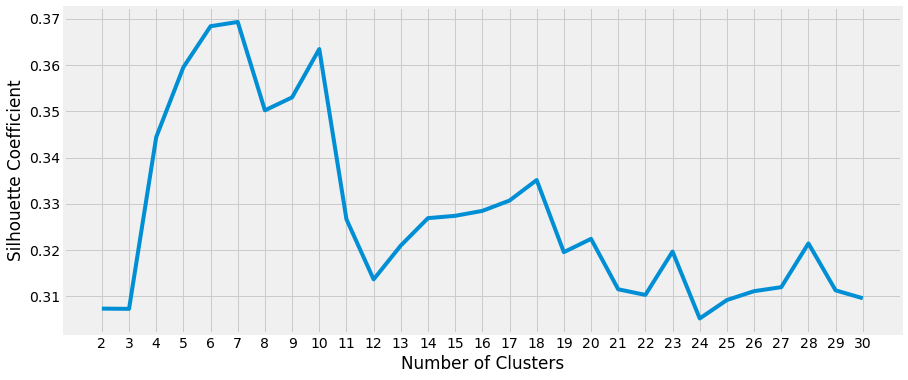

In [19]:
plt.figure(figsize=(15,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 31), silhouette_coefficients)
plt.xticks(range(2, 31))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

According to the plot above, we can read that the optimal number of clusters is 7.

## To-Do 7 Question and Answer

This question is based on Week9's lecture. Please run the jupyternotebook UnsupervisedML_KMeans_PCA.ipynb (https://canvas.uw.edu/courses/1477118/files/83928883?wrap=1) and answer the question:

* What is the optimal number of clusters for the periodic table data in your opinion? Please explain. Using the optimal number of clusters you chose, identify the elements in one of the cluster and explain if these elements clustered into the same cluster makes sense to you?

I think that the optimal number of clusters is 18 since there are 18 groups in the periodic table, and elements in each group have similar chemical and physical properties. For example, Neon and Argon belong to group 18 and they both have  filled stable outer electron shell which is an important issue in chemistry and physics.

In [20]:
url = 'https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv'
df = pd.read_csv(url)
print(df.head())
print(df.columns)

   AtomicNumber    Element Symbol  AtomicMass  NumberofNeutrons  \
0             1   Hydrogen      H       1.007                 0   
1             2     Helium     He       4.002                 2   
2             3    Lithium     Li       6.941                 4   
3             4  Beryllium     Be       9.012                 5   
4             5      Boron      B      10.811                 6   

   NumberofProtons  NumberofElectrons  Period  Group  Phase  ...  \
0                1                  1       1    1.0    gas  ...   
1                2                  2       1   18.0    gas  ...   
2                3                  3       2    1.0  solid  ...   
3                4                  4       2    2.0  solid  ...   
4                5                  5       2   13.0  solid  ...   

  FirstIonization   Density MeltingPoint BoilingPoint NumberOfIsotopes  \
0         13.5984  0.000090       14.175        20.28              3.0   
1         24.5874  0.000179          NaN

In [21]:
# Here are some features of interest, and we'll use "Type" as a target for visualization (all numerical data from the set) 
features = ['AtomicMass', 'NumberofNeutrons', 'NumberofProtons', 'NumberofElectrons','Electronegativity','FirstIonization','Density','MeltingPoint','BoilingPoint']
# for K-means, we don't have a target. this target=['Type'] is to validate the result, we don't need to change it to numerical value.
target = ['Type'] #We set this as target because we want to know if the numercial properties of elements will be enough to classify the elements into its category. 
fandt = np.concatenate((features,target),axis=0)

# New dataframe with just the columns of interest
# [all datasets, just columns]
df2 = df.loc[:, fandt]

# We'll focus on elements whose atomic number is less than 89, because higher than 89, many of the elements missing data for the features we uses. 
cleaned_up = df2.drop(df[df['AtomicNumber'] >= 89].index, inplace = False) 

# Also remove He since it doesn't have a melting point
cleaned_up.drop(df[df['AtomicNumber'] == 2].index, inplace = True) 

# Since noble gases are stable, Noble Gases have an electronegativity of "NaN". for conveniency, we replace the "NaN" values by 0s.
cleaned_up.fillna( value={'Electronegativity':0} ,inplace=True)

cleaned_up = cleaned_up.reset_index(0)
cleaned_up.head()

,index,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,Type
0,0,1.007,0,1,1,2.20,13.5984,0.00009,14.175,20.28,Nonmetal
1,2,6.941,4,3,3,0.98,5.3917,0.53400,453.850,1615.00,Alkali Metal
2,3,9.012,5,4,4,1.57,9.3227,1.85000,1560.150,2742.00,Alkaline Earth Metal
3,4,10.811,6,5,5,2.04,8.2980,2.34000,2573.150,4200.00,Metalloid
4,5,12.011,6,6,6,2.55,11.2603,2.27000,3948.150,4300.00,Nonmetal
